### Open using Jupyter Notebook. It holds the code and visualizations for developing the different classification algorithms (LibSVM, RBF SVM, Naive Bayes, Random Forest, Gradient Boosting) on the chosen subset of important features. 

In [1]:
import pandas as pd
import numpy as np
from numpy import sort
from sklearn.metrics import matthews_corrcoef, accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot
import pylab as pl
from sklearn import svm

%matplotlib inline

In [2]:
SEED = 1234
## Selected set of most important features

featureSet=['L3_S31_F3846','L1_S24_F1578','L3_S33_F3857','L1_S24_F1406','L3_S29_F3348','L3_S33_F3863',
            'L3_S29_F3427','L3_S37_F3950','L0_S9_F170', 'L3_S29_F3321','L1_S24_F1346','L3_S32_F3850',
            'L3_S30_F3514','L1_S24_F1366','L2_S26_F3036']

train_x = pd.read_csv("../data/train_numeric.csv", usecols=featureSet)
train_y = pd.read_csv("../data/train_numeric.csv", usecols=['Response'])

In [3]:
test_x = pd.read_csv("../data/test_numeric.csv", usecols=featureSet)


In [4]:
train_x = train_x.fillna(9999999)
msk = np.random.rand(len(train_x)) < 0.7  # creating Training and validation set 


X_train = train_x[msk]

Y_train = train_y.Response.ravel()[msk]

X_valid = train_x[~msk]
Y_valid = train_y.Response.ravel()[~msk]

In [5]:
def showconfusionmatrix(cm, typeModel):
    pl.matshow(cm)
    pl.title('Confusion matrix for '+typeModel)
    pl.colorbar()
    pl.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

C=4
lin_svc = svm.LinearSVC(C=C).fit(X_train, Y_train)
print "LibSVM fitted"


LibSVM fitted


MCC Score 	 +LinearSVC (linear kernel)0.0


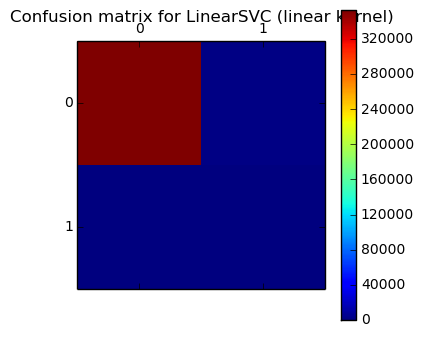

Confusion Matrix
[[352988   2074]
 [     0      0]]


In [10]:
title = 'LinearSVC (linear kernel)'

predicted = lin_svc.predict(X_valid)
mcc= matthews_corrcoef(Y_valid, predicted)
print "MCC Score \t +"+title+str(mcc)

cm = confusion_matrix(predicted, Y_valid)
showconfusionmatrix(cm, title)
print "Confusion Matrix"
print (cm)

MCC Score 	 +SVC with RBF kernel0.0322577344939


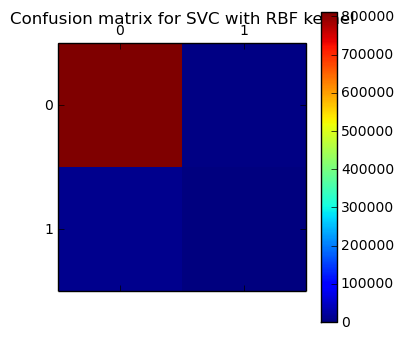

Confusion Matrix
[[811252   4470]
 [ 11860    314]]


In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

C=4
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, Y_train)
print "RBF fitted"


title = 'SVC with RBF kernel'

predicted = rbf_svc.predict(X_valid)
mcc= matthews_corrcoef(Y_valid, predicted)
print "MCC Score \t +"+title+str(mcc)

cm = confusion_matrix(predicted, Y_valid)
showconfusionmatrix(cm, title)
print "Confusion Matrix"
print (cm)

Naive Bayes Fitted
MCC Score 	 +Naive Bayes0.0337046126992


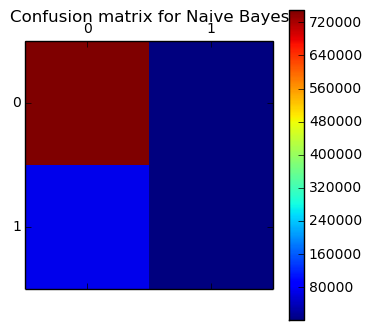

Confusion Matrix
[[749710   3757]
 [ 72970   1032]]


In [10]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

clf = gnb.fit(X_train,Y_train)
print "Naive Bayes Fitted"


title = 'Naive Bayes'

predicted = clf.predict(X_valid)


mcc= matthews_corrcoef(Y_valid, predicted)
print "MCC Score \t +"+title+str(mcc)

cm = confusion_matrix(predicted, Y_valid)
showconfusionmatrix(cm, title)
print "Confusion Matrix"
print (cm)

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV

In [23]:
rf = RandomForestClassifier(n_estimators=20, n_jobs=2)
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }

In [24]:
grid_rf = GridSearchCV(rf, param_grid, cv=10)
rf_model=grid_rf.fit(X_train, Y_train)

RF fitted
MCC Score 	 +Random Forest0.397684988803


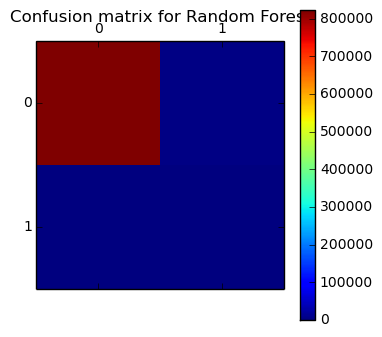

In [30]:
print "RF fitted"

titles = 'Random Forest'

predicted = rf_model.predict(X_valid)
mcc= matthews_corrcoef(Y_valid, predicted)
print "MCC Score \t +"+titles[0]+str(mcc)

cm = confusion_matrix(predicted, Y_valid)
showconfusionmatrix(cm, titles[0])


In [31]:
gb = GradientBoostingClassifier(learning_rate=0.5)
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }

In [32]:
grid_gb = GridSearchCV(gb, param_grid, cv=10)
gb_model=grid_gb.fit(X_train, Y_train)


GB fitted
MCC Score 	 +Gradient Boosting0.41425519667


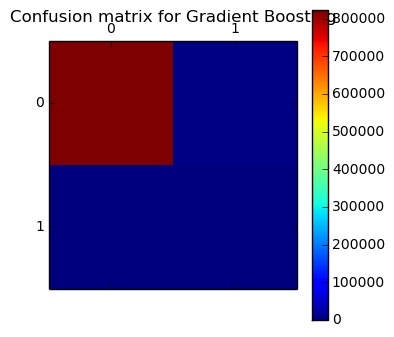

In [36]:
print "GB fitted"

title = 'Gradient Boosting'

predicted = gb_model.predict(X_valid)
mcc= matthews_corrcoef(Y_valid, predicted)
print "MCC Score \t +"+title+str(mcc)

cm = confusion_matrix(predicted, Y_valid)
showconfusionmatrix(cm, title)